In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from copy import copy

from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc

pd.set_option('display.max_columns', 70)
pd.options.mode.chained_assignment = None

data = pd.read_csv('data/check_1_r/train.csv')

In [2]:
print(data.shape)
print(data.dtypes.value_counts())
print(data.nunique())
data.head(5)

(365, 42)
int64      30
float64    11
object      1
dtype: int64
datetime_0    365
target        247
number_0      246
number_1      247
number_2      162
number_3      135
number_4       73
number_5        7
number_6      115
number_7      100
number_8      102
number_9        2
number_10       2
number_11     365
number_12       2
number_13       2
number_14       2
number_15       2
number_16       2
number_17       2
number_18       2
number_19       2
number_20       2
number_21       2
number_22       2
number_23       2
number_24       2
number_25       2
number_26       2
number_27       2
number_28       2
number_29       2
number_30       2
number_31       2
number_32       2
number_33       2
number_34       2
number_35       2
number_36       2
number_37       2
number_38       2
line_id       365
dtype: int64


,datetime_0,target,number_0,number_1,number_2,number_3,number_4,number_5,number_6,number_7,number_8,number_9,number_10,number_11,number_12,number_13,number_14,number_15,number_16,number_17,number_18,number_19,number_20,number_21,number_22,number_23,number_24,number_25,number_26,number_27,number_28,number_29,number_30,number_31,number_32,number_33,number_34,number_35,number_36,number_37,number_38,line_id
0,2017-03-11,0.000000,0.485840,0.169376,0.866834,0.968541,0.001060,1.000000,0.573018,0.981073,0.987302,0,0,0.973126,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2017-01-10,30.231827,0.303703,0.200773,0.869347,0.973308,0.009912,1.000000,0.141864,0.993691,0.987302,0,0,0.969738,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
2,2017-02-26,0.000000,0.568567,0.190993,0.929648,0.987607,0.002207,1.000000,1.000000,1.000000,1.000000,1,0,0.972392,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
3,2017-02-02,22.756754,0.336114,0.051069,0.919598,0.983794,0.006191,1.000000,0.166898,0.984227,0.984127,0,0,0.971037,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5
4,2017-06-08,22.754865,0.330694,0.132386,0.655779,0.889418,0.199192,0.727273,0.126565,0.703470,0.685714,0,0,0.978150,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7


In [3]:
print(any(data.number_9 + data.number_10 == 2))
print(any(data.number_12 + data.number_13 + data.number_14 + data.number_15 \
          + data.number_16 + data.number_17 + data.number_18 == 2))
print(any(data.number_19 + data.number_20 + data.number_21 + data.number_22 \
          + data.number_23 + data.number_24 + data.number_25 + data.number_26 \
          + data.number_27 + data.number_28 + data.number_29 + data.number_30 == 2))
#data.number_31
print(any(data.number_32 + data.number_33 == 2)) 
print(any(data.number_34 + data.number_35 == 2))
print(any(data.number_36 + data.number_37 == 2))
#data.number_38

False
False
False
False
False
False


Непонятная нормировка данных, похоже на minmaxscaler, но не везде заметна нормировка от 0 до 1.
Также вероятно что дамми переменные взяты от нескольких категориальных, ввиду отсутствия повторений по одному наблюдению. Дамии по базовым категориям уже убраны.

In [4]:
data.describe()

,target,number_0,number_1,number_2,number_3,number_4,number_5,number_6,number_7,number_8,number_9,number_10,number_11,number_12,number_13,number_14,number_15,number_16,number_17,number_18,number_19,number_20,number_21,number_22,number_23,number_24,number_25,number_26,number_27,number_28,number_29,number_30,number_31,number_32,number_33,number_34,number_35,number_36,number_37,number_38,line_id
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,21.605257,0.516228,0.205112,0.608632,0.852131,0.290996,0.666252,0.302688,0.646290,0.645210,0.043836,0.030137,0.979957,0.145205,0.142466,0.142466,0.142466,0.142466,0.142466,0.142466,0.084932,0.076712,0.084932,0.082192,0.084932,0.082192,0.084932,0.084932,0.082192,0.084932,0.082192,0.084932,0.010959,0.032877,0.032877,0.032877,0.010959,0.010959,0.065753,0.041096,269.131507
std,16.731888,0.146753,0.127578,0.214655,0.166493,0.171512,0.249354,0.225507,0.256725,0.257029,0.205010,0.171199,0.005957,0.352791,0.350007,0.350007,0.350007,0.350007,0.350007,0.350007,0.279162,0.266500,0.279162,0.275034,0.279162,0.275034,0.279162,0.279162,0.275034,0.279162,0.275034,0.279162,0.104252,0.178559,0.178559,0.178559,0.104252,0.104252,0.248191,0.198785,159.048922
min,0.000000,0.000000,0.000000,0.180905,0.000000,0.000000,0.181818,0.000000,0.186120,0.193651,0.000000,0.000000,0.969682,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.420169,0.108137,0.424623,0.802669,0.196531,0.454545,0.121001,0.429022,0.431746,0.000000,0.000000,0.974819,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,131.000000
50%,27.186048,0.510069,0.178587,0.625628,0.878932,0.394839,0.636364,0.166898,0.630915,0.634921,0.000000,0.000000,0.979957,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,269.000000
75%,32.193718,0.625153,0.283507,0.791457,0.941849,0.399707,0.909091,0.477051,0.905363,0.911111,0.000000,0.000000,0.985095,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,414.000000
max,95.249705,0.904415,0.557598,1.000000,1.000000,0.603106,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.990233,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,535.000000


In [5]:
data["datetime_0"] = pd.to_datetime(data["datetime_0"])

cols = data.nunique()[data.nunique()==2].index.tolist()
data[cols] = data[cols].astype(np.int8)

c:\users\yarne\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  


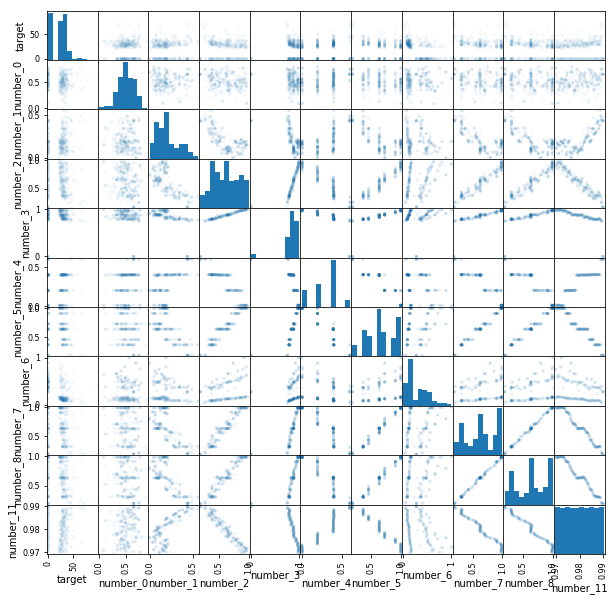

In [6]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(data[data.dtypes[data.dtypes == np.float64].index], alpha = .05, figsize = (10, 10))
pass

number_4 - есть 4 моды, около которых собираются все наблюдения
number_5 - также мультимодальный (или упорядоченный)

In [7]:
# Коррелированные переменные
threshold = 0.75
corr_matrix = data.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
print(to_drop)

['number_4', 'number_5', 'number_7', 'number_8', 'number_11']


In [8]:
data.corr()

,target,number_0,number_1,number_2,number_3,number_4,number_5,number_6,number_7,number_8,number_9,number_10,number_11,number_12,number_13,number_14,number_15,number_16,number_17,number_18,number_19,number_20,number_21,number_22,number_23,number_24,number_25,number_26,number_27,number_28,number_29,number_30,number_31,number_32,number_33,number_34,number_35,number_36,number_37,number_38,line_id
target,1.000000,-0.007723,0.088430,-0.072685,0.101943,0.091003,-0.099073,-0.567423,-0.091819,-0.092310,-0.276858,0.163409,8.109754e-02,2.696505e-01,0.241364,0.183565,0.178696,0.178650,-0.527035,-0.527035,-0.102817,-0.059631,0.003230,-0.036286,-0.024923,0.000526,-0.001181,-0.001917,0.010593,0.035263,0.025351,0.149090,0.169204,0.238805,0.243357,0.174647,0.088573,0.114234,0.246042,0.092842,-0.071313
number_0,-0.007723,1.000000,0.018293,-0.296165,-0.245326,0.259178,-0.283351,-0.003679,-0.239784,-0.232537,0.109416,0.074743,2.278589e-01,4.687083e-02,-0.041116,-0.042091,0.003997,0.010655,0.010655,0.010655,-0.025382,-0.077598,-0.110954,-0.052569,0.090685,-0.072879,0.055700,0.012859,-0.109737,0.069446,0.013920,0.199715,-0.083002,-0.149433,0.063218,-0.061883,-0.031902,-0.109229,0.049128,0.029852,-0.046087
number_1,0.088430,0.018293,1.000000,-0.698635,-0.557113,0.571003,-0.698266,-0.241078,-0.726301,-0.730000,0.081415,-0.108616,7.417327e-01,-1.341157e-04,0.012711,0.047489,-0.022259,-0.012602,-0.012602,-0.012602,0.045373,-0.150622,-0.107812,-0.178443,-0.339465,-0.247743,-0.253947,-0.023984,0.104991,0.214080,0.374382,0.557144,-0.053585,-0.031256,0.030078,-0.083062,0.026858,-0.050815,0.028406,0.005821,-0.022962
number_2,-0.072685,-0.296165,-0.698635,1.000000,0.714638,-0.905809,0.964178,0.337672,0.964365,0.960995,-0.052197,0.075210,-9.656701e-01,1.322797e-03,-0.008935,0.000252,0.010175,-0.000942,-0.000942,-0.000942,0.171945,0.432387,0.344846,0.236404,0.097071,0.069209,0.021506,-0.147249,-0.180883,-0.304023,-0.321772,-0.402742,0.037649,0.020742,0.008495,0.059281,0.037649,0.050604,0.030881,0.039385,-0.029541
number_3,0.101943,-0.245326,-0.557113,0.714638,1.000000,-0.648989,0.701128,0.161513,0.682994,0.677214,-0.345440,0.057266,-6.662939e-01,-1.426346e-02,0.017661,0.020717,0.021976,-0.015326,-0.015326,-0.015326,-0.222651,0.233100,0.212009,0.155533,0.074241,0.053673,0.051364,-0.014111,-0.048416,-0.098970,-0.112301,-0.272180,0.024965,0.025933,0.021088,0.049983,0.026021,0.030548,0.039723,-0.018855,-0.109082
number_4,0.091003,0.259178,0.571003,-0.905809,-0.648989,1.000000,-0.906275,-0.320680,-0.903040,-0.901920,0.009753,-0.111908,9.217860e-01,-3.610967e-03,-0.017104,-0.016765,0.009629,0.009293,0.009293,0.009293,-0.233481,-0.481484,-0.336826,-0.163589,-0.165840,0.021703,0.183846,0.186439,0.184400,0.195069,0.191546,0.399837,0.004242,0.009199,0.008567,-0.046515,-0.024731,-0.025139,0.000016,-0.013349,0.014548
number_5,-0.099073,-0.283351,-0.698266,0.964178,0.701128,-0.906275,1.000000,0.297488,0.991844,0.989797,-0.059898,0.060748,-9.756190e-01,-6.883692e-03,0.002587,0.002587,0.002587,-0.000274,-0.000274,-0.000274,0.150001,0.386333,0.390386,0.291834,0.081832,0.029632,-0.036566,-0.036566,-0.130602,-0.276951,-0.363670,-0.470694,0.016188,-0.010911,-0.005302,0.028354,0.035402,0.025795,0.016584,0.030576,-0.021863
number_6,-0.567423,-0.003679,-0.241078,0.337672,0.161513,-0.320680,0.297488,1.000000,0.302987,0.300340,0.283225,0.082546,-3.080527e-01,-1.401227e-01,-0.291083,-0.288130,-0.296457,0.338969,0.338969,0.338969,0.068001,0.250455,0.037047,0.038073,0.138286,0.010659,-0.014665,-0.139818,-0.077130,-0.084586,-0.094811,-0.121974,0.025430,-0.054050,-0.109182,-0.097415,-0.081024,-0.013251,-0.131089,-0.087410,0.010470
number_7,-0.091819,-0.239784,-0.726301,0.964365,0.682994,-0.903040,0.991844,0.302987,1.000000,0.998860,-0.039352,0.068499,-9.863779e-01,1.607018e-04,0.007287,0.002754,0.000053,-0.003419,-0.003419,-0.003419,0.158884,0.387298,0.389124,0.291848,0.122485,0.024398,-0.019843,-0.041367,-0.150383,-0.308006,-0.390339,-0.449850,0.016354,-0.011814,-0.005008,0.030724,0.0254

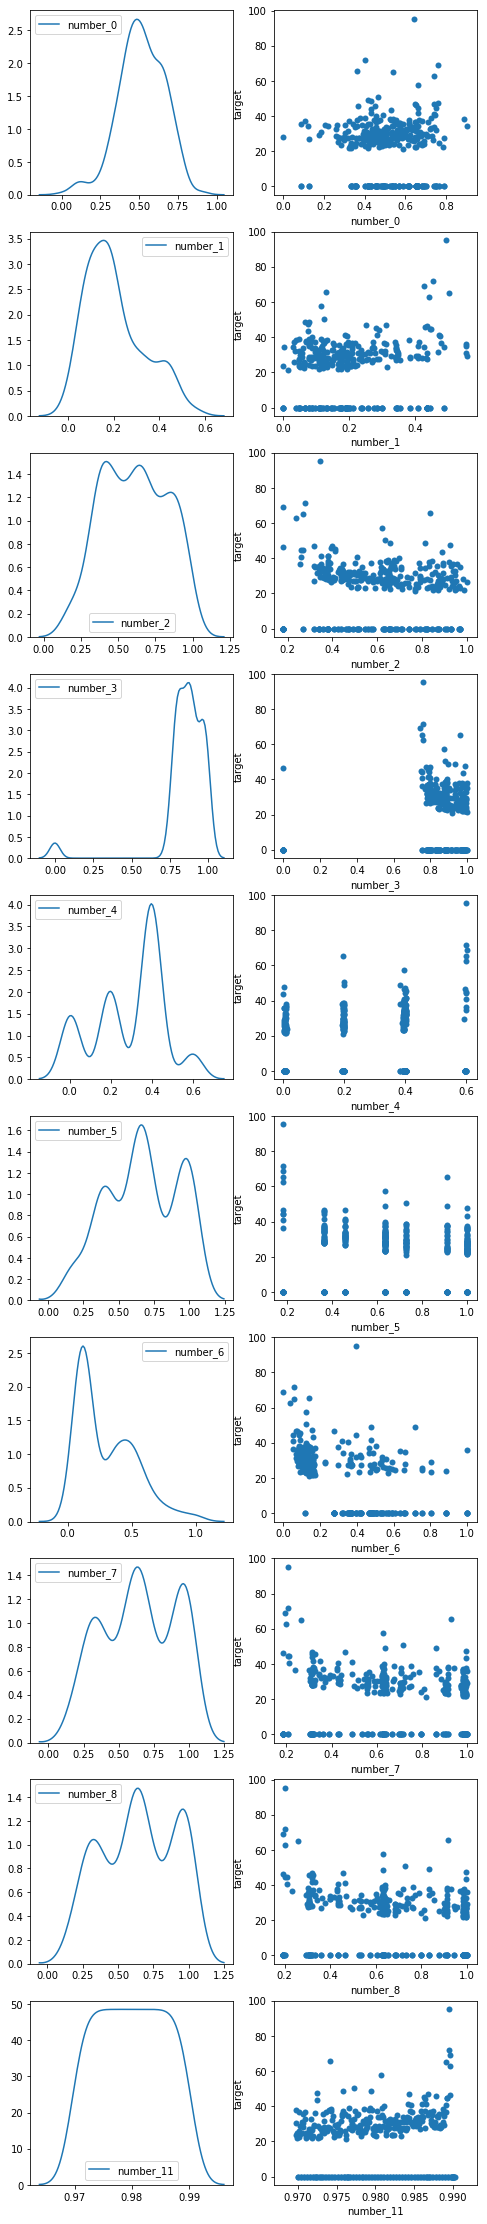

In [9]:
fig, ax = plt.subplots(10, 2, figsize=(8, 40))
sns.kdeplot(data["number_0"], ax=ax[0][0])
sns.scatterplot(x="number_0", y="target", sizes=(1, 8), linewidth=0, data=data, ax=ax[0][1])
sns.kdeplot(data["number_1"], ax=ax[1][0])
sns.scatterplot(x="number_1", y="target", sizes=(1, 8), linewidth=0, data=data, ax=ax[1][1])
sns.kdeplot(data["number_2"], ax=ax[2][0])
sns.scatterplot(x="number_2", y="target", sizes=(1, 8), linewidth=0, data=data, ax=ax[2][1])
sns.kdeplot(data["number_3"], ax=ax[3][0])
sns.scatterplot(x="number_3", y="target", sizes=(1, 8), linewidth=0, data=data, ax=ax[3][1])
sns.kdeplot(data["number_4"], ax=ax[4][0])
sns.scatterplot(x="number_4", y="target", sizes=(1, 8), linewidth=0, data=data, ax=ax[4][1])
sns.kdeplot(data["number_5"], ax=ax[5][0])
sns.scatterplot(x="number_5", y="target", sizes=(1, 8), linewidth=0, data=data, ax=ax[5][1])
sns.kdeplot(data["number_6"], ax=ax[6][0])
sns.scatterplot(x="number_6", y="target", sizes=(1, 8), linewidth=0, data=data, ax=ax[6][1])
sns.kdeplot(data["number_7"], ax=ax[7][0])
sns.scatterplot(x="number_7", y="target", sizes=(1, 8), linewidth=0, data=data, ax=ax[7][1])
sns.kdeplot(data["number_8"], ax=ax[8][0])
sns.scatterplot(x="number_8", y="target", sizes=(1, 8), linewidth=0, data=data, ax=ax[8][1])
sns.kdeplot(data["number_11"], ax=ax[9][0])
sns.scatterplot(x="number_11", y="target", sizes=(1, 8), linewidth=0, data=data, ax=ax[9][1])


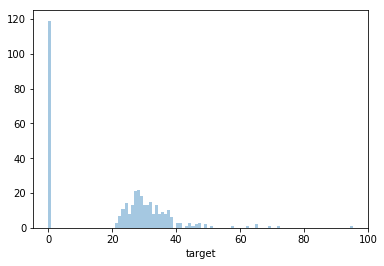

In [10]:
sns.distplot(data["target"], bins=100, kde=False)

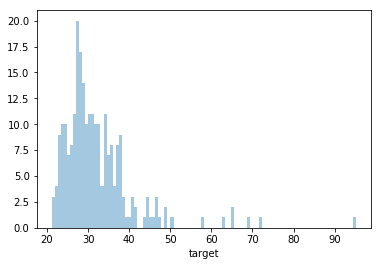

In [11]:
sns.distplot(data["target"][data["target"]!=0], bins=100, kde=False)

Т.к. в таргете присутствует большое количество нулей, можно использовать модель Хекмана

Базовая модель

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from copy import copy
from scipy.stats import norm

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import Ridge, RidgeClassifierCV, ElasticNetCV
from statsmodels.discrete.discrete_model import Probit
from sklearn.metrics import confusion_matrix

pd.set_option('display.max_columns', 70)

In [13]:
def mse(y_true, y_pred):
    temp = np.sqrt(sum((y_true - y_pred)**2)/len(y_true))
    return temp

def r_squared(y_true, y_pred):
    rss = sum((y_true - y_pred) ** 2)
    tss = sum((y_true - np.mean(y_true)) ** 2)
    return 1 - rss/tss

In [14]:
data = pd.read_csv('data/check_1_r/train.csv')
data_test = pd.read_csv('data/check_1_r/test.csv')
target_test = pd.read_csv('data/check_1_r/test-target.csv')

target = data.pop("target")
data.drop(["datetime_0", "line_id"], axis=1, inplace=True)
scaler = MinMaxScaler()
data[data.dtypes[data.dtypes == np.float64].index] = scaler.fit_transform(data[data.dtypes[data.dtypes == np.float64].index])
data["const"] = 1

data_test.drop(["datetime_0", "line_id"], axis=1, inplace=True)
data_test[data_test.dtypes[data_test.dtypes == np.float64].index] = scaler.transform(data_test[data_test.dtypes[data_test.dtypes == np.float64].index])
data_test["const"] = 1

target_test.drop(["line_id"], axis=1, inplace=True)

In [15]:
threshold = 0.9
corr_matrix = data.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
print('There are %d columns to remove.' % (len(to_drop)))
print(to_drop)

There are 5 columns to remove.
['number_4', 'number_5', 'number_7', 'number_8', 'number_11']


In [16]:
#X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)
X_train = data.copy()
y_train = target.copy()
y_train_class = (y_train>0).astype(int)

Probit модель, вероятность не нулевого таргета

In [17]:
selection = Probit(y_train_class, X_train)
selection_result = selection.fit_regularized(alpha=1)

xb_probit_train = np.matmul(X_train, selection_result.params)
pred_train_class = norm.cdf(xb_probit_train)
X_train["inv_mills"] = norm.pdf(xb_probit_train)/norm.cdf(xb_probit_train)

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.065095327843582
            Iterations: 157
            Function evaluations: 157
            Gradient evaluations: 157


Ридж, объем таргета при условии его свершения

In [18]:
X_train = X_train[y_train != 0]
y_train = y_train[y_train != 0]

model = Ridge(alpha=5, fit_intercept=False)
model.fit(X_train, y_train)

Ridge(alpha=5, copy_X=True, fit_intercept=False, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

Проверяем на тестовой выборке

In [19]:
xb_probit_test = np.matmul(data_test, selection_result.params)
pred_test_class = norm.cdf(xb_probit_test)
data_test["inv_mills"] = norm.pdf(xb_probit_test)/norm.cdf(xb_probit_test)

pred_test = model.predict(data_test)
y_valid = pred_test*pred_test_class

In [20]:
print(r_squared(target_test.values.ravel(), y_valid))
print(mse(target_test.values.ravel(), y_valid))

target_test_class = (target_test>0).astype(int)
print(confusion_matrix(target_test_class, np.around(pred_test_class)))
#fpr, tpr, threshold = roc_curve(y_test_class, pred_test_class)
#roc_auc = auc(fpr, tpr)

0.7918604568486326
8.931032659279232
[[ 57   0]
 [  0 115]]


Расширенный вариант, бустинг

In [41]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)
y_train_class = (y_train>0).astype(int)
y_test_class  = (y_test>0).astype(int)

In [42]:
import lightgbm as lgbm
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import KFold, StratifiedKFold

In [43]:
data = pd.read_csv('data/check_1_r/train.csv')
data_test = pd.read_csv('data/check_1_r/test.csv')
target_test = pd.read_csv('data/check_1_r/test-target.csv')

target = data.pop("target")
data.drop(["datetime_0", "line_id"], axis=1, inplace=True)
scaler = MinMaxScaler()
data[data.dtypes[data.dtypes == np.float64].index] = scaler.fit_transform(data[data.dtypes[data.dtypes == np.float64].index])
data["const"] = 1

data_test.drop(["datetime_0", "line_id"], axis=1, inplace=True)
data_test[data_test.dtypes[data_test.dtypes == np.float64].index] = scaler.transform(data_test[data_test.dtypes[data_test.dtypes == np.float64].index])
data_test["const"] = 1

target_test.drop(["line_id"], axis=1, inplace=True)

target_class = (target>0).astype(int)
target_test_class = (target_test>0).astype(int)

In [44]:
folds = KFold(n_splits=10, shuffle=True, random_state=25)

# Create arrays and dataframes to store results
oof_preds = np.zeros(data.shape[0])
sub_preds = np.zeros(data_test.shape[0])
feature_importance_df = pd.DataFrame()

for n_fold, (train_idx, valid_idx) in enumerate(folds.split(data, target_class)):
    train_x, train_y = data.iloc[train_idx], target_class.iloc[train_idx]
    valid_x, valid_y = data.iloc[valid_idx], target_class.iloc[valid_idx]
    
    clf = LGBMClassifier(
        nthread=4,
        boosting = 'dart',
        application = 'binary',
        metric = 'auc',
        dropout_rate = .1,
        n_estimators=1000,
        learning_rate=0.2,
        num_leaves=3,
        feature_fraction=.5,
        max_depth=4,
        reg_alpha=1,
        reg_lambda=.5,
        min_split_gain=0.01,
        min_data_in_leaf=4,
        min_sum_hessian_in_leaf=1)

    clf.fit(train_x, train_y, eval_set=[(train_x, train_y), (valid_x, valid_y)], 
        eval_metric='auc', verbose=2, early_stopping_rounds=10)

    oof_preds[valid_idx] = clf.predict_proba(valid_x, num_iteration=clf.best_iteration_)[:, 1]
    sub_preds += clf.predict_proba(data_test, num_iteration=clf.best_iteration_)[:, 1] / folds.n_splits

    fold_importance_df = pd.DataFrame()
    fold_importance_df["feature"] = data.columns.values
    fold_importance_df["importance"] = clf.feature_importances_
    fold_importance_df["fold"] = n_fold + 1
    feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
    print('Fold %2d AUC : %.6f' % (n_fold + 1, roc_auc_score(valid_y, oof_preds[valid_idx])))
    
    #del clf, train_x, train_y, valid_x, valid_y
    #gc.collect()

print('Full AUC score %.6f' % roc_auc_score(target_class, oof_preds))

target_test_proba = sub_preds

Training until validation scores don't improve for 10 rounds.
[2]	training's auc: 0.987208	valid_1's auc: 0.98
[4]	training's auc: 0.991373	valid_1's auc: 0.988333
[6]	training's auc: 0.998034	valid_1's auc: 0.996667
[8]	training's auc: 0.998372	valid_1's auc: 1
[10]	training's auc: 0.997949	valid_1's auc: 1
[12]	training's auc: 0.997949	valid_1's auc: 1
[14]	training's auc: 0.99833	valid_1's auc: 1
[16]	training's auc: 0.998774	valid_1's auc: 0.996667
Early stopping, best iteration is:
[7]	training's auc: 0.99871	valid_1's auc: 1
Fold  1 AUC : 1.000000
Training until validation scores don't improve for 10 rounds.
[2]	training's auc: 0.973322	valid_1's auc: 0.978788
[4]	training's auc: 0.980662	valid_1's auc: 0.978788
[6]	training's auc: 0.994312	valid_1's auc: 1
[8]	training's auc: 0.998862	valid_1's auc: 1
[10]	training's auc: 0.998991	valid_1's auc: 1
[12]	training's auc: 0.996909	valid_1's auc: 1
[14]	training's auc: 0.997124	valid_1's auc: 1
[16]	training's auc: 0.997639	valid_1's

[[ 48   9]
 [  0 115]]


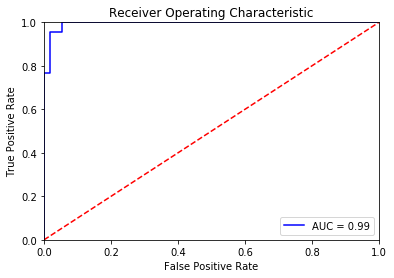

In [45]:
print(confusion_matrix(target_test_class, np.around(target_test_proba)))
fpr, tpr, threshold = roc_curve(target_test_class, target_test_proba)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

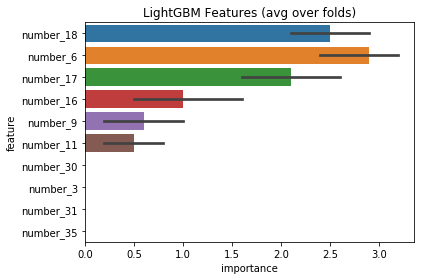

In [46]:
def display_importances(feature_importance_df_):
    cols = feature_importance_df_[["feature", "importance"]].groupby("feature").mean()\
        .sort_values(by="importance", ascending=False)[:10].index
    best_features = feature_importance_df_.loc[feature_importance_df_.feature.isin(cols)]
    plt.figure(figsize=(6, 4))
    sns.barplot(x="importance", y="feature", data=best_features.sort_values(by="importance", ascending=False))
    plt.title('LightGBM Features (avg over folds)')
    plt.tight_layout()
    plt.savefig('lgbm_importances01.png')
display_importances(feature_importance_df)

In [47]:
from lightgbm import LGBMRegressor

folds = KFold(n_splits=10, shuffle=True, random_state=25)

data_clear = data[target != 0]
target_clear = target[target != 0]

# Create arrays and dataframes to store results
oof_preds = np.zeros(data_clear.shape[0])
sub_preds = np.zeros(data_test.shape[0])
feature_importance_df = pd.DataFrame()

for n_fold, (train_idx, valid_idx) in enumerate(folds.split(data_clear, target_clear)):
    train_x, train_y = data_clear.iloc[train_idx], target_clear.iloc[train_idx]
    valid_x, valid_y = data_clear.iloc[valid_idx], target_clear.iloc[valid_idx]
    
    clf = LGBMRegressor(
        nthread=4,
        boosting = 'dart',
        application = 'regression',
        metric = 'mean_squared_error',
        dropout_rate = .1,
        n_estimators=1000,
        learning_rate=0.2,
        num_leaves=3,
        feature_fraction=.75,
        max_depth=4,
        reg_alpha=.5,
        reg_lambda=.5)

    clf.fit(train_x, train_y, eval_set=[(train_x, train_y), (valid_x, valid_y)], 
        eval_metric='mean_squared_error', verbose=2, early_stopping_rounds=10)

    oof_preds[valid_idx] = clf.predict(valid_x, num_iteration=clf.best_iteration_)
    sub_preds += clf.predict(data_test, num_iteration=clf.best_iteration_) / folds.n_splits

    fold_importance_df = pd.DataFrame()
    fold_importance_df["feature"] = data.columns.values
    fold_importance_df["importance"] = clf.feature_importances_
    fold_importance_df["fold"] = n_fold + 1
    feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
    print('Fold %2d AUC : %.6f' % (n_fold + 1, mse(valid_y, oof_preds[valid_idx])))
    
    #del clf, train_x, train_y, valid_x, valid_y
    #gc.collect()

print('MSE score %.6f' % mse(target_clear, oof_preds))

y_pred_sum = sub_preds

Training until validation scores don't improve for 10 rounds.
[2]	training's l2: 69.115	valid_1's l2: 44.4181
[4]	training's l2: 61.7352	valid_1's l2: 46.042
[6]	training's l2: 57.6442	valid_1's l2: 51.3366
[8]	training's l2: 57.0083	valid_1's l2: 49.4878
[10]	training's l2: 54.5644	valid_1's l2: 50.7876
Early stopping, best iteration is:
[1]	training's l2: 74.8103	valid_1's l2: 41.5158
Fold  1 AUC : 6.443274
Training until validation scores don't improve for 10 rounds.
[2]	training's l2: 68.065	valid_1's l2: 69.492
[4]	training's l2: 62.4309	valid_1's l2: 60.4007
[6]	training's l2: 58.5902	valid_1's l2: 55.1834
[8]	training's l2: 58.1142	valid_1's l2: 54.408
[10]	training's l2: 55.7603	valid_1's l2: 51.3389
[12]	training's l2: 55.1695	valid_1's l2: 52.0846
[14]	training's l2: 53.4719	valid_1's l2: 49.6806
[16]	training's l2: 51.2873	valid_1's l2: 49.4199
[18]	training's l2: 49.7462	valid_1's l2: 49.1051
[20]	training's l2: 48.6329	valid_1's l2: 47.4013
[22]	training's l2: 48.3442	vali

In [48]:
pred_result = y_pred_sum * target_test_proba

In [49]:
print(r_squared(target_test.values.ravel(), pred_result))
print(mse(target_test.values.ravel(), pred_result))

0.5012679538754925
13.824773235751303


In [50]:
target_test_class = (target_test>0).astype(int)
print(confusion_matrix(target_test_class, np.around(target_test_proba)))

[[ 48   9]
 [  0 115]]
